#LOADING IMPORTANT PACKAGES


In [ ]:
!pip install pyspellchecker
import os
import re
import string
import hashlib
from nltk.corpus import words
from nltk.tokenize import word_tokenize
from bs4 import BeautifulSoup
from spellchecker import SpellChecker


import nltk
nltk.download('punkt')
nltk.download('words')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 27.3 MB/s eta 0:00:00


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [ ]:
folder_path = '/content/'

In [ ]:
# Set up the dictionary of valid English words
valid_words = set(words.words())
spell = SpellChecker()

#Preprocessing of the Corpus

In [ ]:
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('stopwords')
# Set up stop words
stop_words = set(stopwords.words('english'))


def preprocess_text(text):
    """Preprocess the text based on the provided rules."""

    # 1.Remove non-ASCII characters
    text = text.encode("ascii", "ignore").decode()

    # 2. Remove brackets and their content (e.g., [1], [2007])
    text = re.sub(r'\[.*?\]', '', text)

    # 3. Remove non-standard punctuation and separate punctuation from words
    text = re.sub(r'([.,;\'"$])', r' \1 ', text)  # Separate punctuation from words

    # 3. Remove all punctuation and special characters (except alphanumeric characters)
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # Remove all non-alphanumeric characters

    # Ensure text is properly formatted and tokenized as words (not characters)
    tokens = word_tokenize(text)

    # 4. Remove words longer than 20 characters
    tokens = [word.lower() for word in tokens if len(word) <= 20  and word not in stop_words]

    # 5. Convert to lower case
    tokens = [word.lower() for word in tokens]




    # 7. Replace URLs, emails, IP addresses, and numbers > 9 with special markers
    tokens = [re.sub(r'\b\d{2,}\b',"", word) for word in tokens]  # Numbers greater than 9
    tokens = [re.sub(r'\bhttps?://\S+\b',"", word) for word in tokens]  # URLs
    tokens = [re.sub(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b', "", word) for word in tokens]  # Emails
    tokens = [re.sub(r'\b\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}\b', "", word) for word in tokens]  # IP Addresses

    # Remove empty tokens and ensure proper formatting
    tokens = [token for token in tokens if token.strip() and len(token)!=0]

    return tokens


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
!pip install hashlib
import hashlib

def hash_text(text):
    # Use sha256 instead of the non-existent sha128
    return hashlib.sha256(text.encode('utf-8')).hexdigest()

ERROR: Ignored the following yanked versions: 20081119
ERROR: Could not find a version that satisfies the requirement hashlib (from versions: none)
ERROR: No matching distribution found for hashlib


In [ ]:
# Function to process each file
def process_file(file_path, processed_hashes):
    """Function to read and preprocess a single file."""
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()

    # Hash the text to check for duplicates
    text_hash = hash_text(text)
    if text_hash in processed_hashes:
        return None  # Skip duplicate file

    processed_hashes.add(text_hash)  # Store the hash

    tokens = preprocess_text(text)
    return tokens

In [ ]:
def parallel_preprocess_to_single_file(files, output_file):
    """Preprocess the provided list of text files using multiprocessing and save to a single file."""
    processed_hashes = set()  # To track and avoid duplicates

    # Set up multiprocessing pool to preprocess files in parallel
    with mp.Pool(mp.cpu_count()) as pool:
        results = pool.starmap(process_file, [(file, processed_hashes) for file in files])

    # Combine results from all files into a single text
    combined_text = []
    for tokens in results:
        if tokens:
            combined_text.extend(tokens)

    # Save the combined text into a single output file
    with open(output_file, 'w', encoding='utf-8') as output:
        output.write(' '.join(combined_text))  # Save as space-separated text


In [ ]:
# Get list of text files (only .txt) in the folder
files = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith('.txt')]


In [ ]:
files

['/content/text_corpus_part_1.txt',
 '/content/text_corpus_part_5.txt',
 '/content/text_corpus_part_3.txt',
 '/content/text_corpus_part_6.txt',
 '/content/text_corpus_part_2.txt',
 '/content/text_corpus_part_4.txt']

In [ ]:
output_file = '/content/combined_preprocessed_text.txt'

# Preprocess the files and save the combined result to a single file
parallel_preprocess_to_single_file(files, output_file)


In [ ]:
from google.colab import files

# Replace with the path to your output file
output_file = '/content/combined_preprocessed_text.txt'

# Download the file
files.download(output_file)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Path to your preprocessed text file
file_path="combined_preprocessed_text.txt"
# Open and read the file
with open(file_path, 'r', encoding='utf-8') as file:
    content = file.read()

# Split the content into words.
new_words= content.split()


In [ ]:
# Save important_words list to a text file
with open('new_words.txt', 'w') as f:
    for word in new_words:
        f.write(word + '\n')  # Write each word on a new line

print("Important words saved to 'new_words.txt'.")


Important words saved to 'new_words.txt'.


In [ ]:
from google.colab import files

# Download the file to your local machine
files.download('new_words.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Print the first few words
print(new_words[:10])

['according', 'current', 'live', 'statistics', 'time', 'editing', 'letter', 'russia', 'third', 'country']


In [ ]:
len(new_words)

72785171

In [ ]:
# Assume 'words' is your list of tokens (words)
unique_words = set(new_words)  # Convert the list to a set to get unique words

# Count the number of unique words
num_unique_words = len(unique_words)

# Print the result
print(f"Number of unique words: {num_unique_words}")


Number of unique words: 1075229


In [ ]:
from nltk.corpus import words

# Assuming 'tokens' is your list of words and 'valid_words' is a set of real English words
valid_words = set(word.lower() for word in words.words())  # Ensure valid_words is all lowercase

# Filter out the unreal words (i.e., words not in the valid_words set)
filtered_words = [word for word in new_words if word.lower() in valid_words]

# Print the number of valid words retained
print(f"Number of valid words retained: {len(filtered_words)}")


Number of valid words retained: 44918904


In [ ]:
unique_words=set(filtered_words)
print(f"Number of unique valid words retained: {len(unique_words)}")


Number of unique valid words retained: 59585


In [ ]:
# Print the first few words
print(filtered_words[:10])

['according', 'current', 'live', 'statistics', 'time', 'letter', 'russia', 'third', 'country', 'world']


In [ ]:
'covid 19' in filtered_words

False

In [ ]:
'covid' in filtered_words

True

In [ ]:
filtered_words.append('covid19')
filtered_words.append('covid 19')

#Reducing the vocabulary size to approximately 7K

In [ ]:
from collections import Counter

# Step 1: Count the frequency of each word in the list
word_freq = Counter(filtered_words)

# Step 2: Get the top 6,900 most frequent words
most_common_words = word_freq.most_common(6900)  # Adjust size as needed
important_words = set([word for word, freq in most_common_words])

# Step 3: Define a list of important COVID-related terms (adjust as needed)
covid_words = ['virus', 'vaccine', 'pandemic', 'quarantine', 'lockdown', 'mask', 'infection',
               'social distancing', 'isolation', 'antibodies', 'covid', 'sars', 'coronavirus']

# Step 4: Ensure that all COVID-related words are retained
important_words.update(covid_words)

# Step 5: Filter 'filtered_words' to retain only important words
reduced_filtered_words = [word for word in filtered_words if word in important_words]

# Step 6: Output the reduced vocabulary size
print(f"Reduced vocabulary size: {len(important_words)}")


Reduced vocabulary size: 6905


In [ ]:
print(reduced_filtered_words[:10])

['according', 'current', 'live', 'statistics', 'time', 'letter', 'russia', 'third', 'country', 'world']


In [ ]:
len(reduced_filtered_words)

42693312

In [ ]:
# Save important_words list to a text file
with open('important_words.txt', 'w') as f:
    for word in important_words:
        f.write(word + '\n')  # Write each word on a new line

print("Important words saved to 'important_words.txt'.")


Important words saved to 'important_words.txt'.


In [ ]:
from google.colab import files

# Download the file to your local machine
files.download('important_words.txt')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Five Nouns and Five Verbs related to COVID19 from the Corpus

In [ ]:
import nltk
from collections import Counter
from multiprocessing import Pool, cpu_count

# Download the POS tagger data if not already done
nltk.download('averaged_perceptron_tagger')

# Function to POS-tag a batch of tokens
def pos_tag_batch(batch):
    return nltk.pos_tag(batch)

# Step 1: Define the function to split the list into smaller chunks for parallel processing
def process_in_parallel(tokenized_words, num_processes=None, batch_size=50000):
    if not num_processes:
        num_processes = cpu_count()  # Use all available CPUs

    # Split the tokenized words into batches
    batches = [tokenized_words[i:i + batch_size] for i in range(0, len(tokenized_words), batch_size)]

    # Use multiprocessing Pool to parallelize POS tagging
    with Pool(processes=num_processes) as pool:
        tagged_words = pool.map(pos_tag_batch, batches)  # POS-tagging in parallel

    # Flatten the list of tagged batches into a single list
    return [word for batch in tagged_words for word in batch]

# Step 2: POS Tag the tokenized corpus (new_words) using multiprocessing
tagged_words = process_in_parallel(new_words)

# Step 3: Extract nouns (NN, NNS) and verbs (VB, VBD, VBG, VBN, VBP, VBZ)
nouns = [word for word, pos in tagged_words if pos in ['NN', 'NNS']]
verbs = [word for word, pos in tagged_words if pos in ['VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ']]

# Step 4: Filter nouns and verbs to retain only those in important_words (the reduced vocabulary)
filtered_nouns = [word for word in nouns if word in important_words]
filtered_verbs = [word for word in verbs if word in important_words]

# Step 5: Count the frequency of these nouns and verbs
noun_freq = Counter(filtered_nouns)
verb_freq = Counter(filtered_verbs)

# Step 6: Get the top 5 most common nouns and verbs related to COVID
top_nouns = noun_freq.most_common(5)
top_verbs = verb_freq.most_common(5)

# Output the results
print("Top 5 COVID-related nouns:", top_nouns)
print("Top 5 COVID-related verbs:", top_verbs)


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Top 5 COVID-related nouns: [('data', 202948), ('infection', 195705), ('study', 172285), ('al', 171814), ('virus', 164013)]
Top 5 COVID-related verbs: [('used', 177879), ('found', 95944), ('associated', 90353), ('based', 85285), ('shown', 83503)]


In [ ]:
with open('new_words.txt', 'r') as file:
    lines = file.readlines()

new_words = [line.strip() for line in lines]




In [ ]:
with open('important_words.txt', 'r') as file:
    lines = file.readlines()

important_words = [line.strip() for line in lines]


In [ ]:
print(new_words[:10])

['according', 'current', 'live', 'statistics', 'time', 'editing', 'letter', 'russia', 'third', 'country']


In [ ]:
print(important_words[:10])

['deficiency', 'minister', 'obstacle', 'robert', 'cellular', 'unusual', 'attention', 'restore', 'operation', 'ethical']


In [ ]:
'covid' in important_words

True

In [ ]:
import multiprocessing as mp

# Function to filter a chunk of words based on vocab
def filter_words_in_vocab(chunk, vocab):
    return [word for word in chunk if word in vocab]

# Function to parallelize the filtering process
def parallel_filter(new_words, vocab):
    num_cores = mp.cpu_count()  # Get the number of available CPU cores
    chunk_size = len(new_words) // num_cores  # Split the data for each core

    # Split the corpus into chunks for each core
    chunks = [new_words[i * chunk_size:(i + 1) * chunk_size] for i in range(num_cores)]
    if len(new_words) % num_cores != 0:
        chunks.append(new_words[num_cores * chunk_size:])  # Handle any remainder

    # Parallelize the filtering
    with mp.Pool(num_cores) as pool:
        results = pool.starmap(filter_words_in_vocab, [(chunk, vocab) for chunk in chunks])

    # Combine the results from all processes
    all_tokens = [word for sublist in results for word in sublist]
    return all_tokens

# Use the parallel filtering function
vocab = set(important_words)
all_tokens = parallel_filter(new_words, vocab)


#Constructing The Cooccurence Matrix

In [ ]:
import numpy as np
from collections import Counter
from scipy.sparse import lil_matrix
import multiprocessing as mp

# Step 1: Use the tokenized corpus in 'new_words' and the list 'important_words'
vocab = set(important_words)  # Convert the vocabulary to a set for fast lookup

# Step 2: Initialize the co-occurrence matrix (size: 7,000 x 7,000) as sparse
vocab_size = len(vocab)
vocab_index = {word: idx for idx, word in enumerate(important_words)}  # Mapping words to indices
cooccurrence_matrix = lil_matrix((vocab_size, vocab_size), dtype=np.float32)  # Sparse matrix

# Step 3: Calculate total word frequencies in the tokenized corpus
word_freq = Counter(all_tokens)  # Word frequencies for calculating P(ik)

# Step 4: Set a context window size (e.g., 5 words before and after the target word)
window_size = 5

# Define a function to update the co-occurrence matrix in parallel
def process_window(start_idx, end_idx):
    local_matrix = lil_matrix((vocab_size, vocab_size), dtype=np.float32)  # Local matrix for the process

    for i in range(start_idx, end_idx):
        word = new_words[i]
        if word in vocab:
            word_idx = vocab_index[word]

            # Define context window with weights
            context_window = new_words[max(0, i - window_size):min(len(new_words), i + window_size + 1)]

            for j, context_word in enumerate(context_window):
                if context_word in vocab and context_word != word:
                    context_idx = vocab_index[context_word]

                    # Calculate the weight based on the distance from the target word
                    distance = abs(i - (i - window_size + j)) + 1  # The distance from the target word
                    weight = 1 / distance  # Weight inversely proportional to distance

                    # P(ik) = Frequency of (word, context_word) / Total occurrences of context_word
                    P_ik = word_freq[word] / len(all_tokens)
                    P_jk = word_freq[context_word] / len(all_tokens)

                    # Update the local co-occurrence matrix with ratio P(ik)/P(jk) weighted by distance
                    local_matrix[word_idx, context_idx] += (P_ik / P_jk) * weight
    return local_matrix

# Step 5: Parallelize the process using multiprocessing
num_cores = mp.cpu_count()  # Get number of available CPU cores
chunk_size = len(new_words) // num_cores  # Split the data for each process

# Split the corpus into chunks for each core
chunks = [(i * chunk_size, (i + 1) * chunk_size) for i in range(num_cores)]
if len(new_words) % num_cores != 0:
    chunks[-1] = (chunks[-1][0], len(new_words))  # Handle any remainder

# Run the co-occurrence matrix calculation in parallel
with mp.Pool(num_cores) as pool:
    results = pool.starmap(process_window, chunks)

# Step 6: Combine results from all processes into the main co-occurrence matrix
for result in results:
    cooccurrence_matrix += result

# Output the co-occurrence matrix
print("Co-occurrence matrix shape:", cooccurrence_matrix.shape)


Co-occurrence matrix shape: (6905, 6905)


#5 Best Similar Words(with respect to cosine similarity) For Every Word In The Vocabulary Withh Respect to The Word Embedding From The Cooccurence Matrix Created

In [ ]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Assuming `cooccurrence_matrix` is your co-occurrence matrix and `vocab_index` maps words to their row indices
vocab_list = list(vocab_index.keys())  # List of words corresponding to rows in the matrix


# Normalize the rows (L2 normalization) so each row vector has magnitude 1
row_norms = np.linalg.norm(cooccurrence_matrix.toarray(), axis=1, keepdims=True) # Convert sparse matrix to dense array

# Replace zero row norms with a small value to avoid division by zero
row_norms[row_norms == 0] = 1e-8  # Replace 0 with a small value

normalized_matrix = cooccurrence_matrix / row_norms

# Compute cosine similarity between all word vectors
similarity_matrix = cosine_similarity(normalized_matrix)

# Find top 5 similar words for each word in the vocabulary
def find_similar_words_from_matrix(word, vocab_index, similarity_matrix, top_n=5):
    if word not in vocab_index:
        return []  # Skip if the word is not in the matrix
    word_idx = vocab_index[word]

    # Get the row for the word in the similarity matrix
    similarities = similarity_matrix[word_idx]

    # Get indices of the top N similar words (excluding the word itself)
    similar_indices = np.argsort(similarities)[::-1][1:top_n+1]

    # Return the top N most similar words and their cosine similarity
    return [(vocab_list[idx], similarities[idx]) for idx in similar_indices]

# Display the result for each word in the vocab
for word in vocab_list:
    similar_words = find_similar_words_from_matrix(word, vocab_index, similarity_matrix)
    print(f"Word: {word}")
    for similar_word, similarity in similar_words:
        print(f"  Similar Word: {similar_word}, Cosine Similarity: {similarity:.4f}")

Streaming output truncated to the last 5000 lines.
  Similar Word: say, Cosine Similarity: 0.4888
  Similar Word: get, Cosine Similarity: 0.4555
Word: risque
  Similar Word: elle, Cosine Similarity: 0.6611
  Similar Word: cours, Cosine Similarity: 0.6360
  Similar Word: recherche, Cosine Similarity: 0.6324
  Similar Word: tout, Cosine Similarity: 0.6294
  Similar Word: les, Cosine Similarity: 0.6172
Word: approximate
  Similar Word: compute, Cosine Similarity: 0.4203
  Similar Word: calculation, Cosine Similarity: 0.3518
  Similar Word: counting, Cosine Similarity: 0.3502
  Similar Word: method, Cosine Similarity: 0.3448
  Similar Word: algorithm, Cosine Similarity: 0.3441
Word: gate
  Similar Word: syrian, Cosine Similarity: 0.4405
  Similar Word: apple, Cosine Similarity: 0.2503
  Similar Word: lots, Cosine Similarity: 0.2198
  Similar Word: plot, Cosine Similarity: 0.2080
  Similar Word: output, Cosine Similarity: 0.2028
Word: metallic
  Similar Word: metal, Cosine Similarity: 0.390

#Taken 3 concepts and words related to the 3 specific concepts.

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


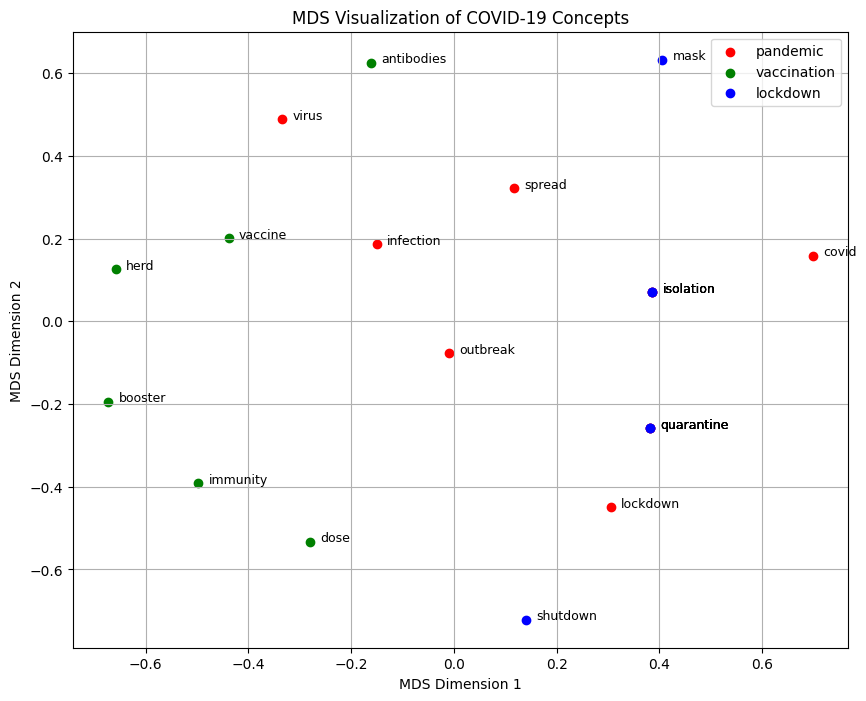

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_distances
from sklearn.manifold import MDS

# Example: Three concepts related to COVID-19
concepts = {
    "pandemic": ["virus", "covid", "outbreak", "infection", "spread", "lockdown", "quarantine", "symptoms", "isolation", "curfew"],
    "vaccination": ["vaccine", "immunity", "dose", "booster", "shot", "pfizer", "moderna", "antibodies", "herd", "side_effects"],
    "lockdown": ["quarantine", "stay_home", "restrictions", "social_distancing", "curfew", "shutdown", "isolation", "travel_ban", "mask", "essential_services"]
}

# Step 1: Get the word vectors from the co-occurrence matrix
# Assuming `vocab_index` contains the mapping of words to indices in the co-occurrence matrix
words = sum(concepts.values(), [])  # Flatten the list of words

# Filter words to include only those present in vocab_index
words = [word for word in words if word in vocab_index]

word_indices = [vocab_index[word] for word in words]

# Step 2: Extract word vectors from the co-occurrence matrix
word_vectors = cooccurrence_matrix[word_indices]

# Step 3: Compute cosine distances between the word vectors
distance_matrix = cosine_distances(word_vectors)

# Step 4: Apply MDS for 2D visualization
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
mds_coordinates = mds.fit_transform(distance_matrix)

# Step 5: Visualize the words with different colors for each concept
plt.figure(figsize=(10, 8))

# Assign different colors for each concept
colors = {"pandemic": 'r', "vaccination": 'g', "lockdown": 'b'}

# Plot the words
for concept, color in colors.items():
    indices = [i for i, word in enumerate(words) if word in concepts[concept]]
    plt.scatter(mds_coordinates[indices, 0], mds_coordinates[indices, 1], c=color, label=concept)

    # Annotate the points with word labels
    for i in indices:
        plt.text(mds_coordinates[i, 0] + 0.02, mds_coordinates[i, 1], words[i], fontsize=9)

# Add a legend and title
plt.legend()
plt.title("MDS Visualization of COVID-19 Concepts")
plt.xlabel("MDS Dimension 1")
plt.ylabel("MDS Dimension 2")
plt.grid(True)
plt.show()